In [1]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle



     -------------------------------------- 288.2/288.2 kB 1.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv('bank.csv')

In [ ]:
#finding missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean()))
else:
    print("no missing value found")

no missing value found


In [ ]:
# Find Features with One Value
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [ ]:
#Exploring the Categorical Features
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


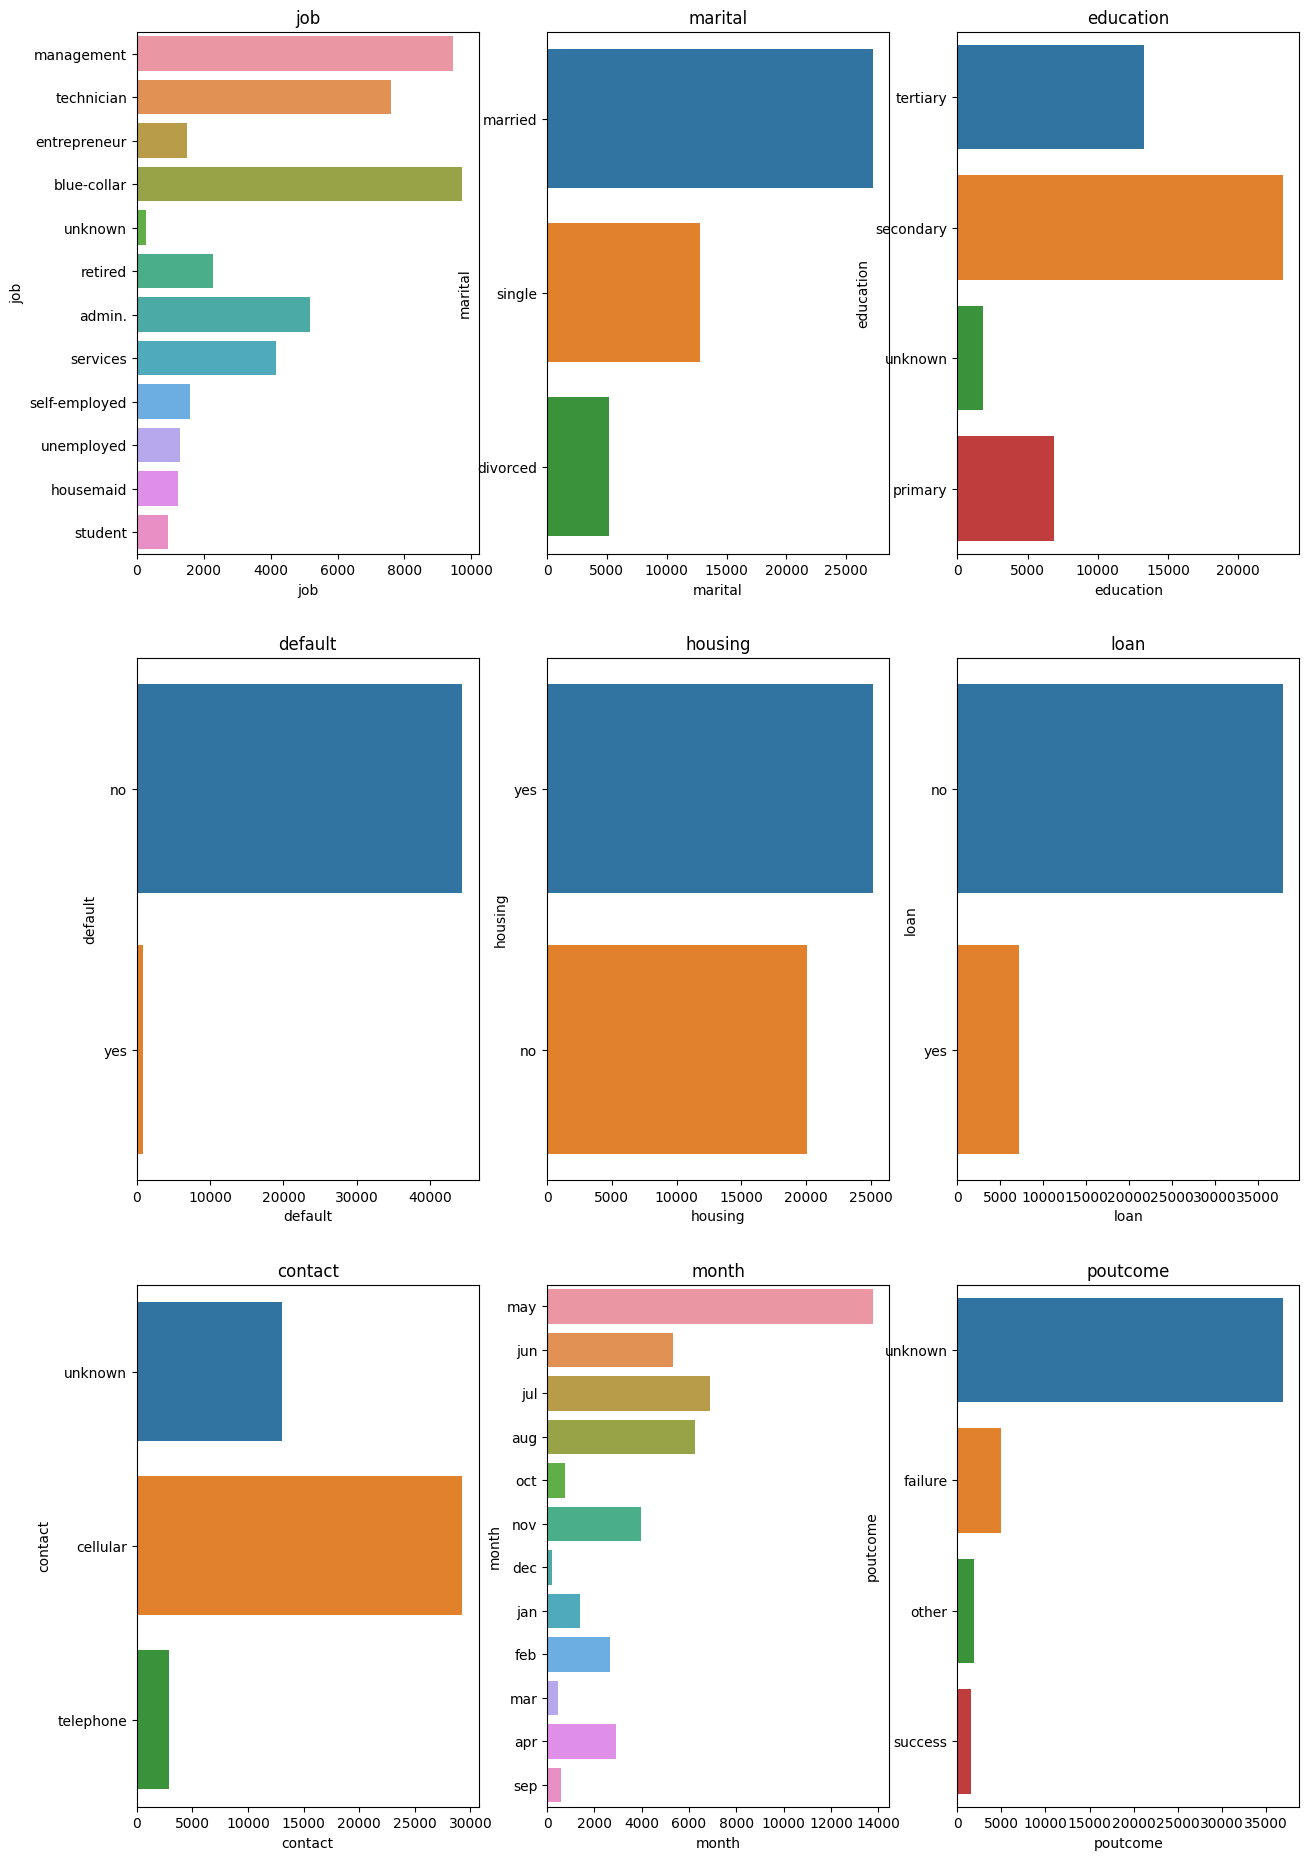

In [ ]:
#Finding Categorical Feature Distribution
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(10,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

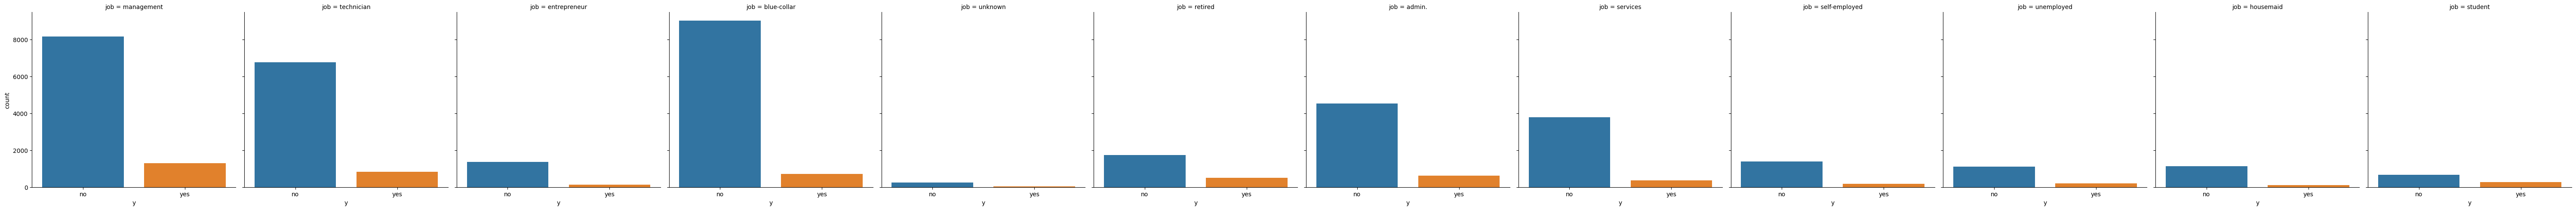

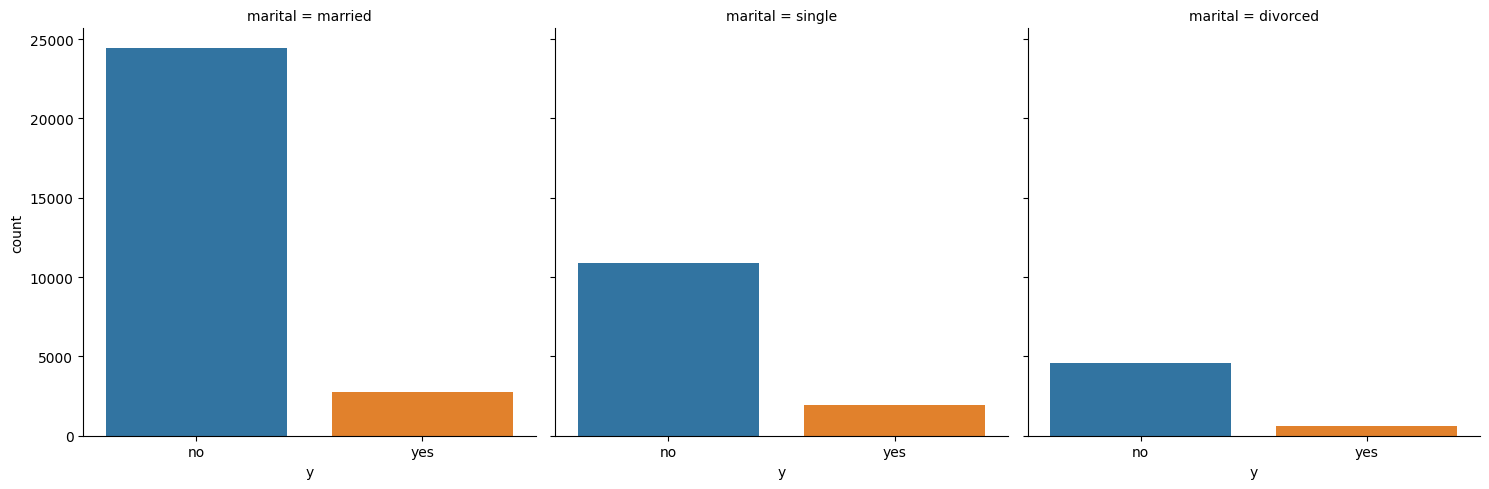

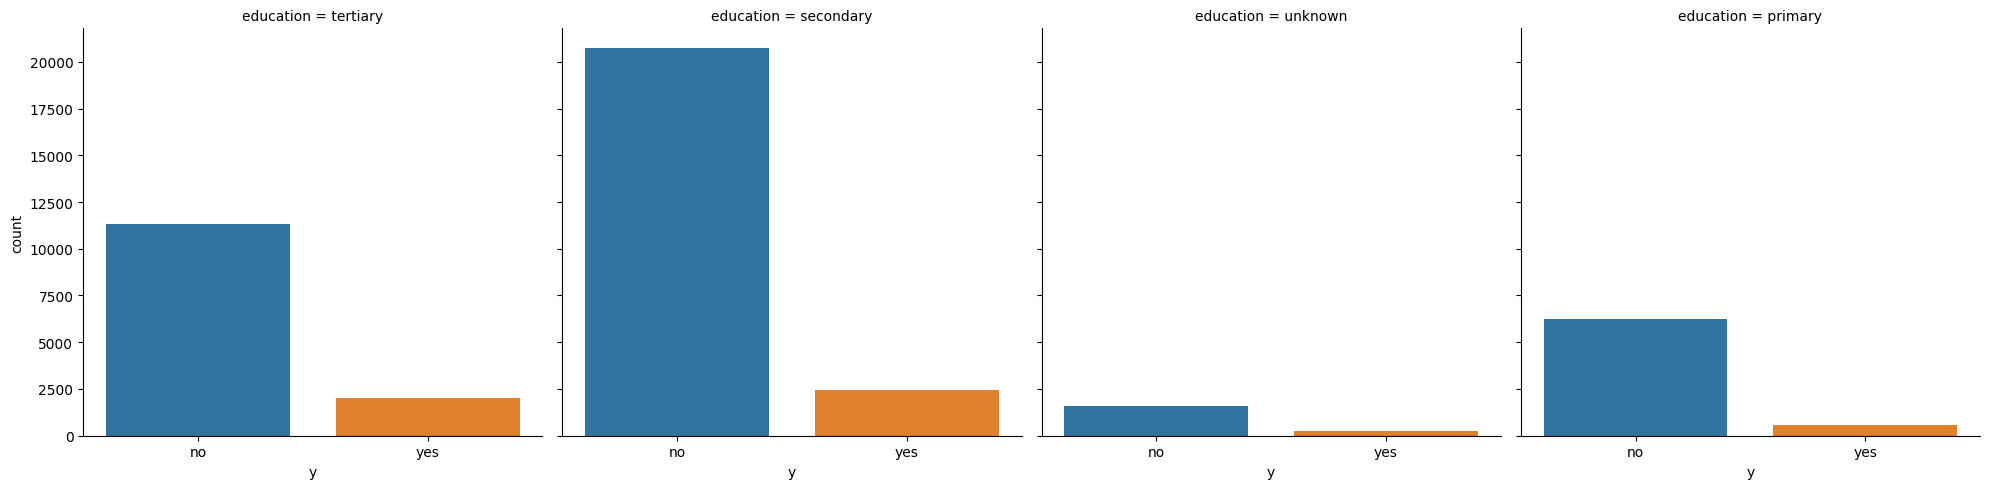

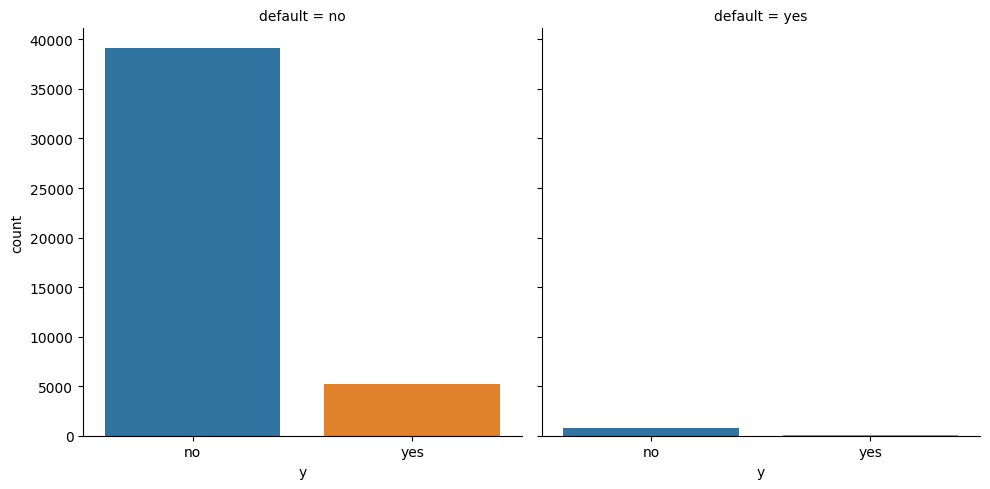

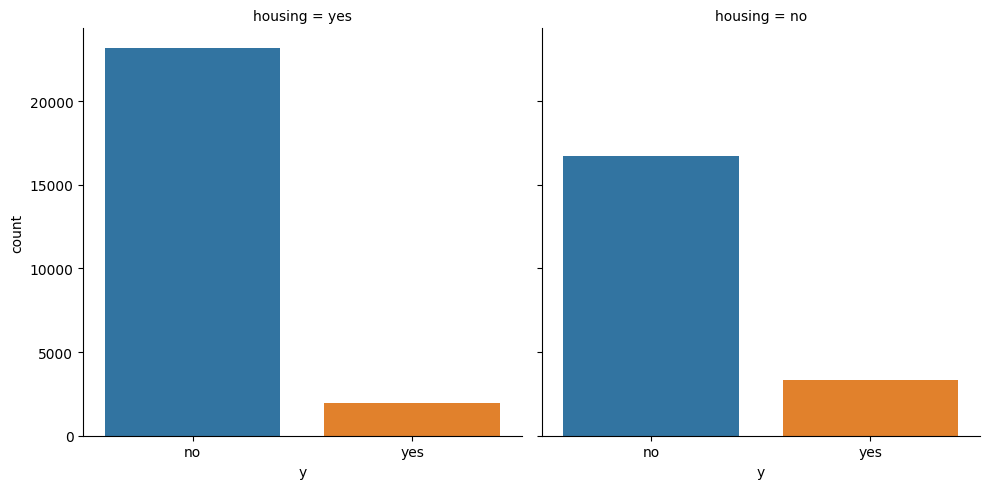

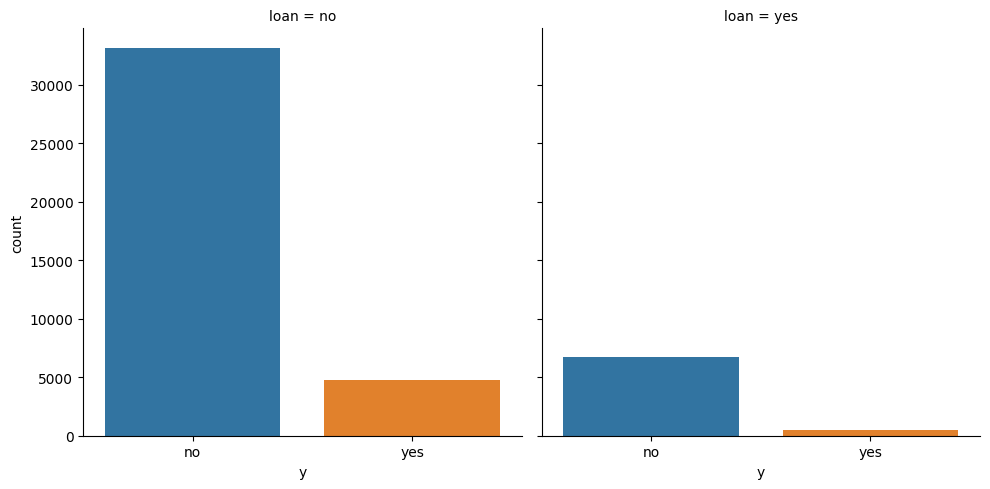

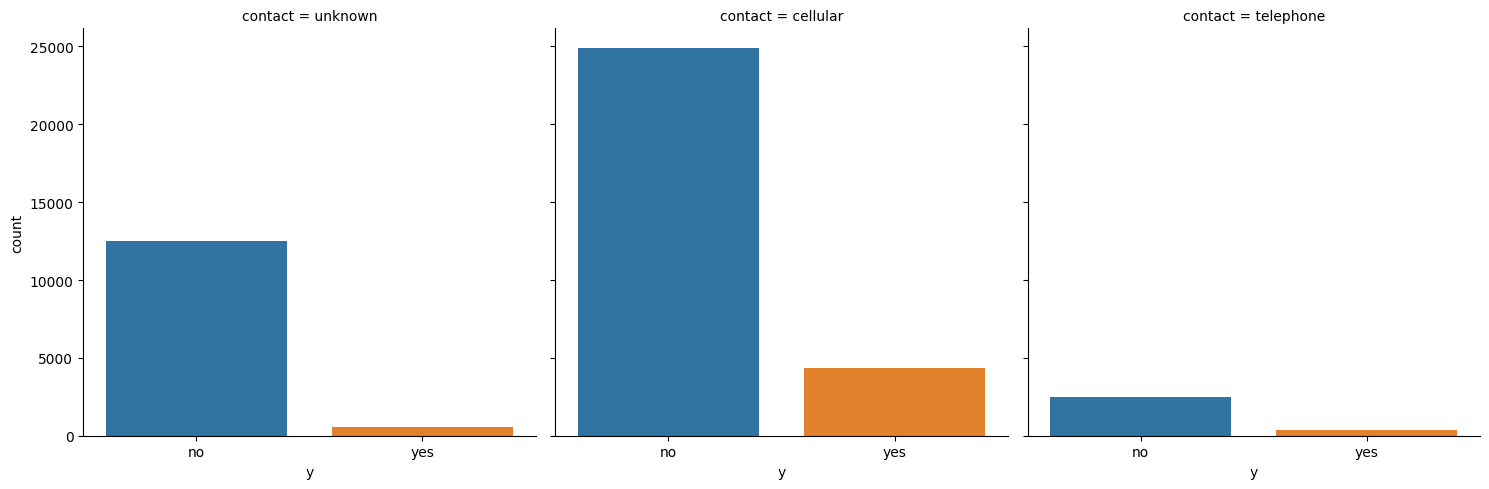

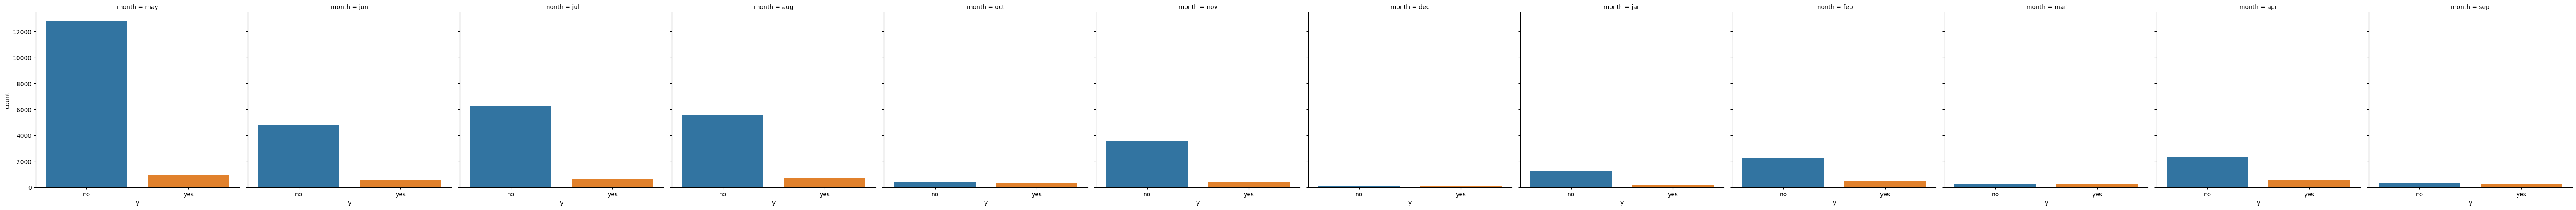

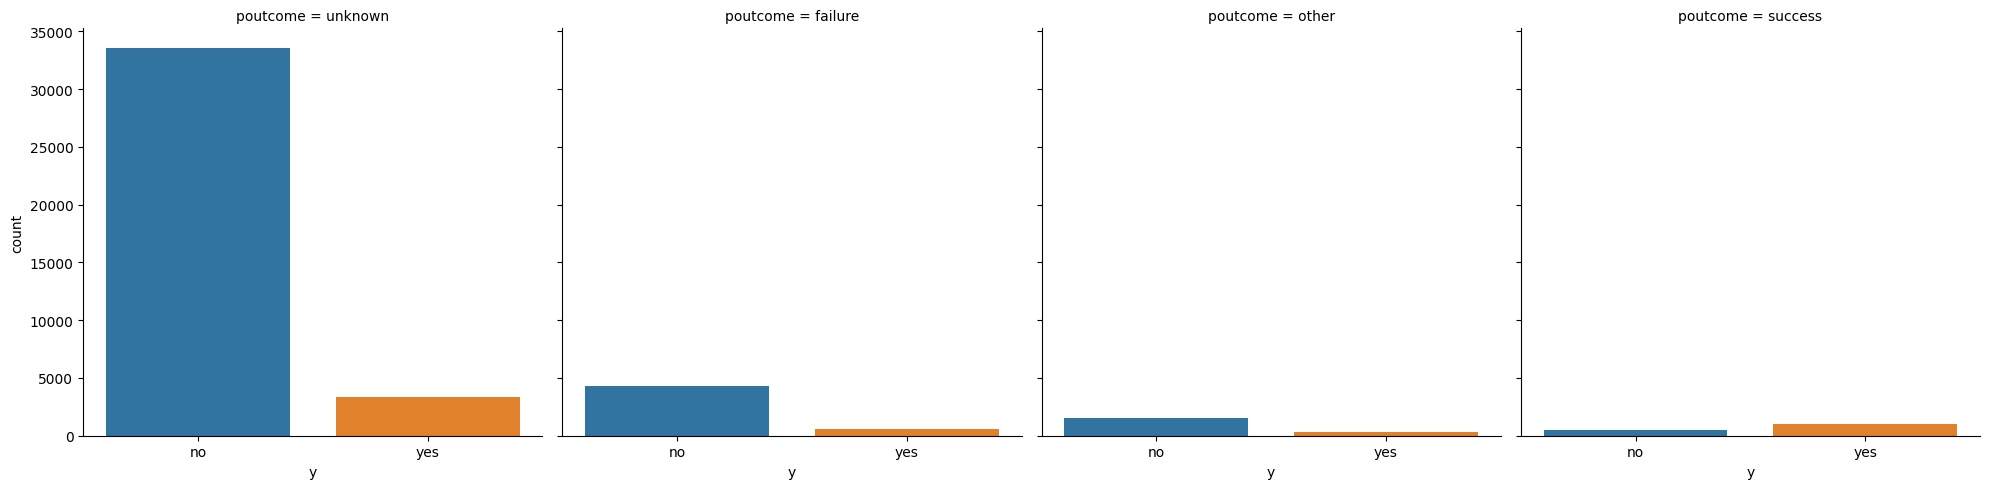

In [ ]:
#checking target label split over categorical values
#finding out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data=df)
plt.show()

In [ ]:
#list of numerical features
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables:', len(numerical_features))

#visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


C:\Users\VamsiMuramreddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VamsiMuramreddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VamsiMuramreddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

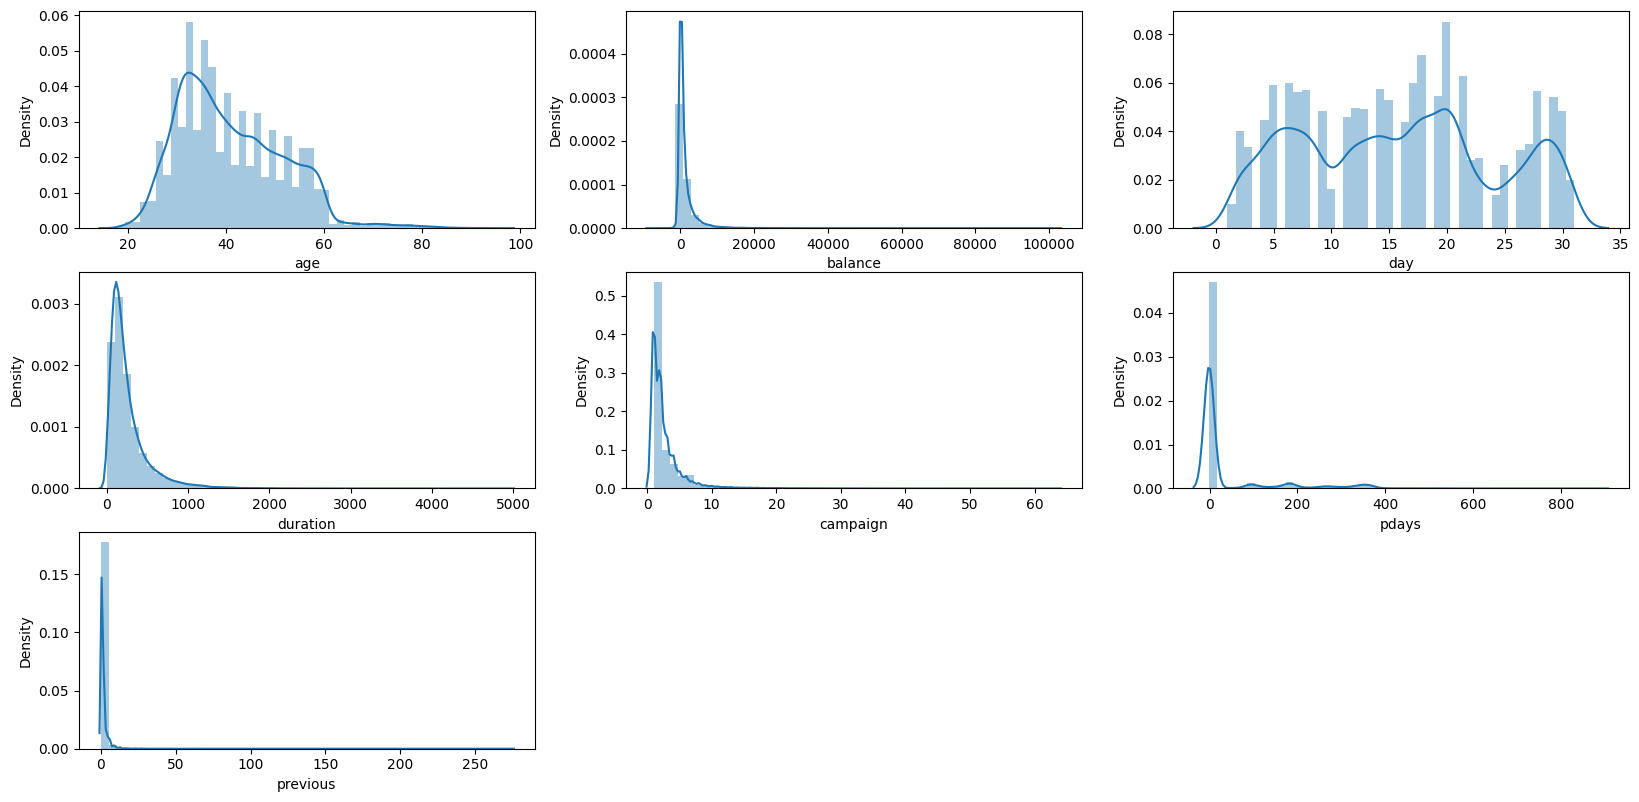

In [ ]:
#Distrubution of numerical features
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

C:\Users\VamsiMuramreddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VamsiMuramreddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VamsiMuramreddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

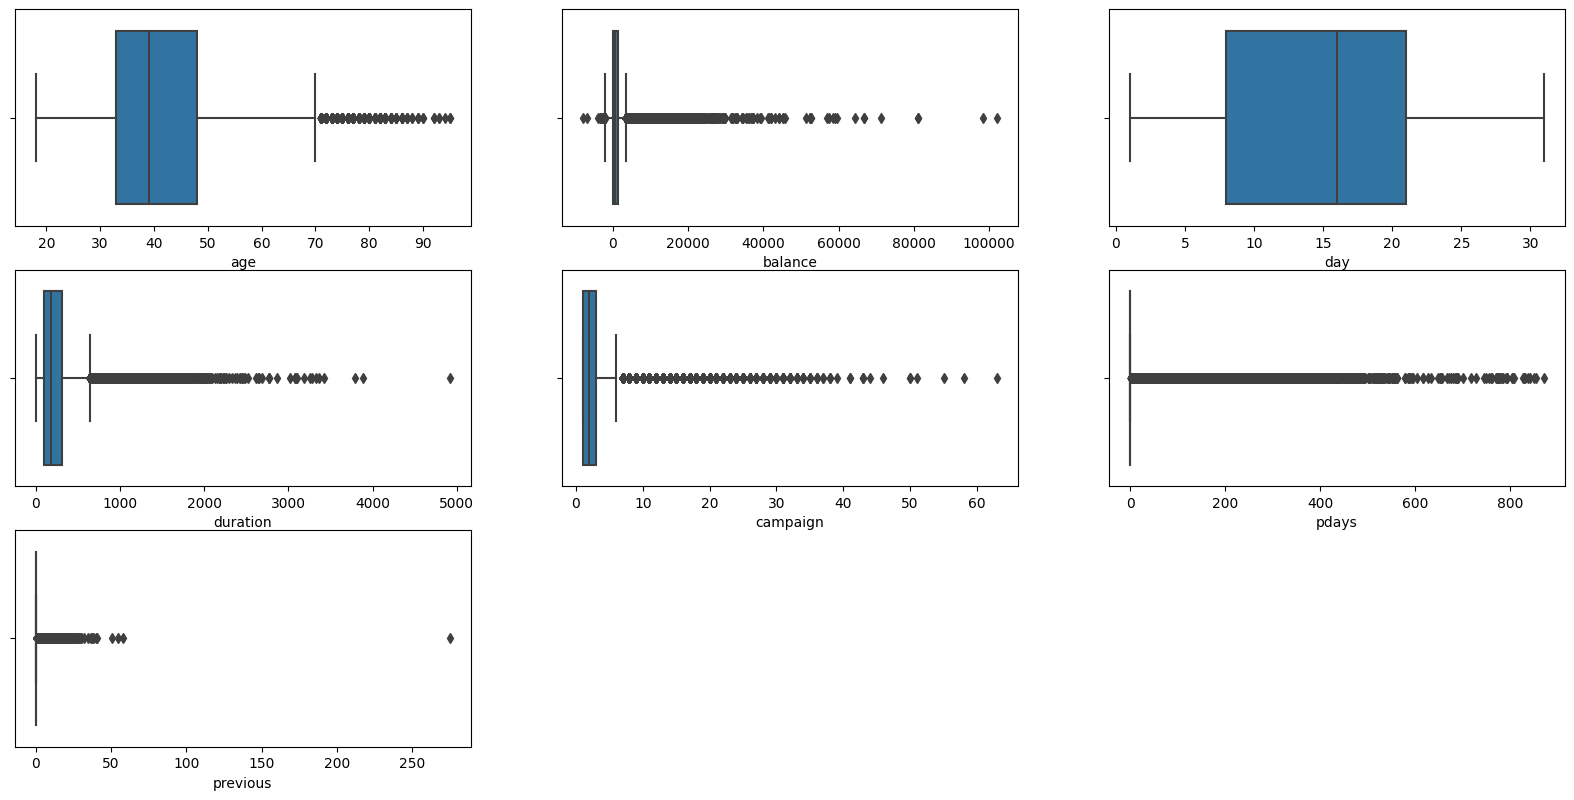

In [ ]:
#finding outliers in numerical features
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

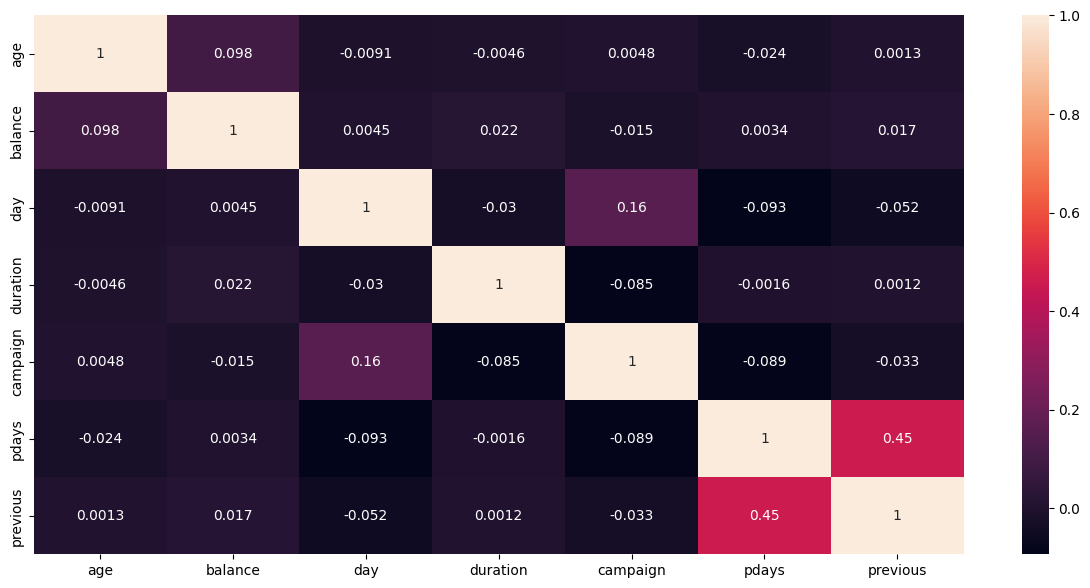

In [ ]:
#checking for correlation
cor_mat = df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [ ]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
y_no_count, y_yes_count =df['y'].value_counts()
y_yes = df[df['y'] == 'yes']
y_no = df[df['y'] == 'no']
y_yes_over = y_yes.sample(y_no_count,replace=True)
df_balanced = pd.concat([y_yes_over,y_no], axis=0)
df_balanced['y'].groupby(df_balanced['y']).count()

y
no     39922
yes    39922
Name: y, dtype: int64

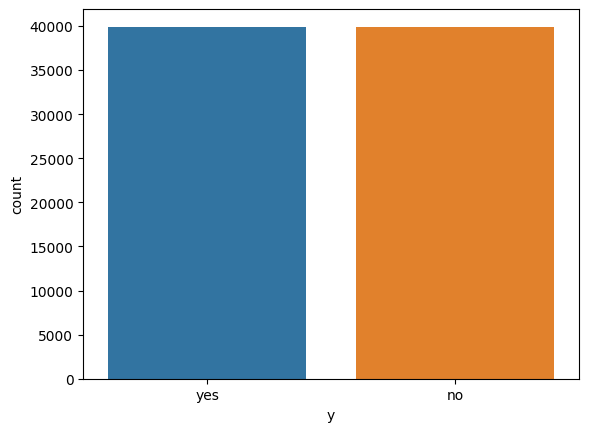

In [ ]:
sns.countplot(x='y', data=df_balanced)
plt.show()

In [ ]:
df2=df_balanced.copy()

In [ ]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40132,25,services,single,secondary,no,801,no,no,cellular,5,jun,255,2,-1,0,unknown,yes
20734,35,technician,married,secondary,no,-180,no,yes,cellular,13,aug,823,2,-1,0,unknown,yes
5669,30,technician,married,tertiary,no,541,yes,no,unknown,26,may,414,2,-1,0,unknown,yes
17473,27,admin.,single,secondary,no,192,no,no,telephone,28,jul,1076,17,-1,0,unknown,yes
33854,29,admin.,married,secondary,no,7707,yes,no,cellular,29,apr,961,2,334,2,failure,yes


In [ ]:

df2.replace({'job':{'management':0,'technician':1,'entrepreneur':2,'blue-collar':3,'unknown':4,'retired':5,'admin.':6,'services':7,'self-employed':8,'unemployed':9,'housemaid':10,'student':11}},inplace=True)

df2.replace({'marital':{'single':0,'married':1,'divorced':2,'unknown':3}},inplace=True)

df2.replace({'education':{'primary':0,'secondary':1,'tertiary':2,'unknown':3}},inplace=True)

df2.replace({'contact':{'cellular':0,'telephone':1,'unknown':2}},inplace=True)

df2.replace({'month':{'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}},inplace=True)

df2.replace({'poutcome':{'failure':0,'success':1,'unknown':2,'other':3}},inplace=True)

In [ ]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40132,25,7,0,1,no,801,no,no,0,5,5,255,2,-1,0,2,yes
20734,35,1,1,1,no,-180,no,yes,0,13,7,823,2,-1,0,2,yes
5669,30,1,1,2,no,541,yes,no,2,26,4,414,2,-1,0,2,yes
17473,27,6,0,1,no,192,no,no,1,28,6,1076,17,-1,0,2,yes
33854,29,6,1,1,no,7707,yes,no,0,29,3,961,2,334,2,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0,1,2,no,138,yes,yes,0,16,10,162,2,187,5,0,no
45198,37,0,1,2,no,1428,no,no,0,16,10,333,2,-1,0,2,no
45199,34,3,0,1,no,1475,yes,no,0,16,10,1166,3,530,12,3,no
45209,57,3,1,1,no,668,no,no,1,17,10,508,4,-1,0,2,no


In [ ]:
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df2[col+'_new']=df2[col].apply(lambda x : 1 if x == 'yes' else 0)
    df2.drop(col, axis=1, inplace=True)

In [ ]:
df2

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,housing_new,loan_new,y_new
40132,25,7,0,1,no,801,0,5,5,255,2,-1,0,2,0,0,1
20734,35,1,1,1,no,-180,0,13,7,823,2,-1,0,2,0,1,1
5669,30,1,1,2,no,541,2,26,4,414,2,-1,0,2,1,0,1
17473,27,6,0,1,no,192,1,28,6,1076,17,-1,0,2,0,0,1
33854,29,6,1,1,no,7707,0,29,3,961,2,334,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0,1,2,no,138,0,16,10,162,2,187,5,0,1,1,0
45198,37,0,1,2,no,1428,0,16,10,333,2,-1,0,2,0,0,0
45199,34,3,0,1,no,1475,0,16,10,1166,3,530,12,3,1,0,0
45209,57,3,1,1,no,668,1,17,10,508,4,-1,0,2,0,0,0


In [ ]:
#defaut features does not play imp role
df2.groupby(['y_new','default']).size()

y_new  default
0      no         39159
       yes          763
1      no         39580
       yes          342
dtype: int64

In [ ]:
df2.drop(['default'],axis=1, inplace=True)

In [ ]:
df2.groupby(['y_new','pdays']).size()

y_new  pdays
0      -1       33570
        1           9
        2          35
        3           1
        4           1
                ...  
1       804         7
        805         7
        828         9
        842         8
        854         8
Length: 914, dtype: int64

In [ ]:
df2.drop(['pdays'],axis=1, inplace=True)

In [ ]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()

age
18     76
19    120
20    146
21    223
22    404
     ... 
90     14
92     16
93      6
94      1
95     11
Name: age, Length: 77, dtype: int64

In [ ]:
# remove outliers in feature balance...
df2.groupby(['y_new','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

y_new  balance
0      -8019       1
       -6847       1
       -4057       1
       -3372       1
       -3313       1
                  ..
1       34646      7
        36252     10
        45248      9
        52587     15
        81204     19
Name: balance, Length: 9258, dtype: int64

In [ ]:
# remove outliers in feature campaign...
df2.groupby(['y_new','campaign'],sort=True)['campaign'].count()

y_new  campaign
0      1           14983
       2           11104
       3            4903
       4            3205
       5            1625
                   ...  
1      20              8
       21             10
       24              6
       29             10
       32             12
Name: campaign, Length: 70, dtype: int64

In [ ]:
df3 = df2[df2['campaign'] < 40]

In [ ]:
df3.groupby(['y_new','campaign'],sort=True)['campaign'].count()

y_new  campaign
0      1           14983
       2           11104
       3            4903
       4            3205
       5            1625
                   ...  
1      20              8
       21             10
       24              6
       29             10
       32             12
Name: campaign, Length: 61, dtype: int64

In [ ]:
df3.groupby(['y_new','previous'],sort=True)['previous'].count()

y_new  previous
0      0           33557
       1            2189
       2            1650
       3             848
       4             543
                   ...  
1      26             12
       29              4
       30             10
       55             12
       58              7
Name: previous, Length: 66, dtype: int64

In [ ]:
df4 = df3[df3['previous'] < 50]

In [ ]:
df4.groupby(['y_new','previous'],sort=True)['previous'].count()

y_new  previous
0      0           33557
       1            2189
       2            1650
       3             848
       4             543
                   ...  
1      22              4
       23              7
       26             12
       29              4
       30             10
Name: previous, Length: 62, dtype: int64

In [ ]:
df4

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
40132,25,7,0,1,801,0,5,5,255,2,0,2,0,0,1
20734,35,1,1,1,-180,0,13,7,823,2,0,2,0,1,1
5669,30,1,1,2,541,2,26,4,414,2,0,2,1,0,1
17473,27,6,0,1,192,1,28,6,1076,17,0,2,0,0,1
33854,29,6,1,1,7707,0,29,3,961,2,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0,1,2,138,0,16,10,162,2,5,0,1,1,0
45198,37,0,1,2,1428,0,16,10,333,2,0,2,0,0,0
45199,34,3,0,1,1475,0,16,10,1166,3,12,3,1,0,0
45209,57,3,1,1,668,1,17,10,508,4,0,2,0,0,0


In [ ]:
df4.to_csv('clean_bank.csv')

In [37]:
X = df4.drop(['y_new'],axis=1)
y = df4['y_new']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [38]:
len(X_train)

63848

In [39]:
len(X_test)

15962

Model Selection

In [40]:
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dt.score(X_test, y_test)

0.9584638516476632

In [43]:
rt = RandomForestClassifier(n_estimators=100, n_jobs=1)
rt.fit(X_train, y_train)
rt.score(X_test, y_test)

0.9674852775341436

In [44]:
lr= make_pipeline(StandardScaler(),LogisticRegression())
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7987720836987846

In [45]:
import pickle
rt.fit(X_train, y_train)
filename = 'finalised_model.pkl'
pickle.dump(rt,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.predict(X_test)

In [46]:
print(result)

[1 0 1 ... 0 0 1]
